<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Vidu2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.0 MB/s eta 0:00:00


Final Price: 80.2564102564102


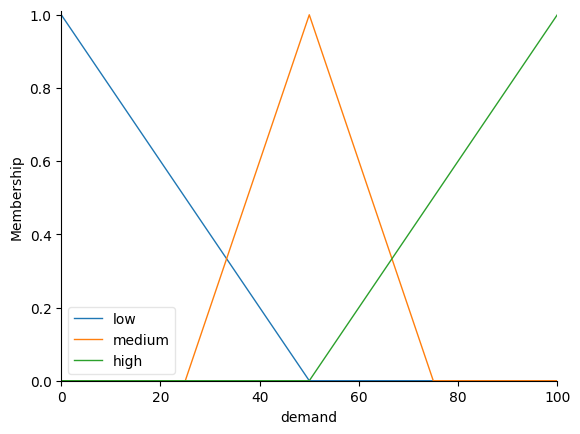

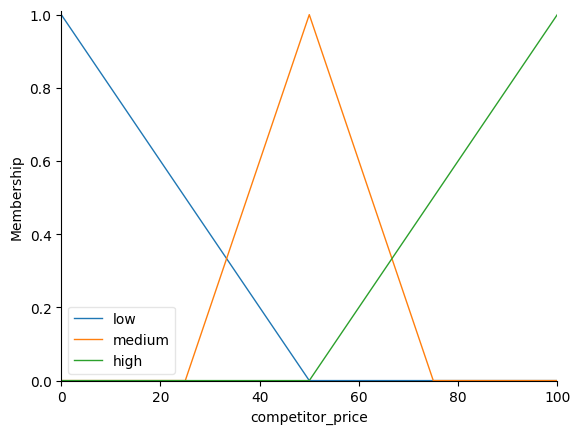

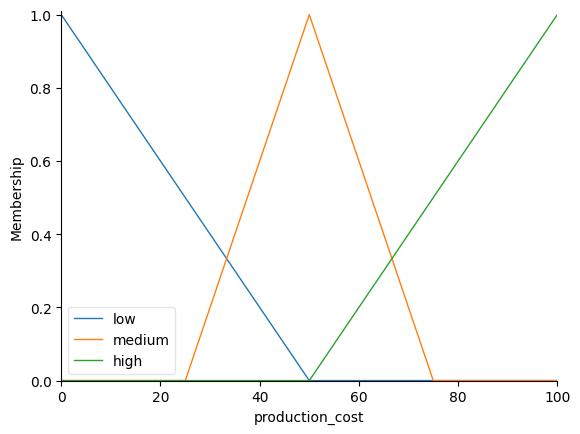

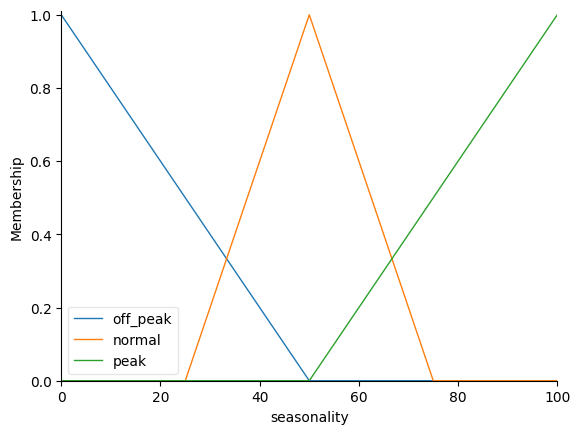

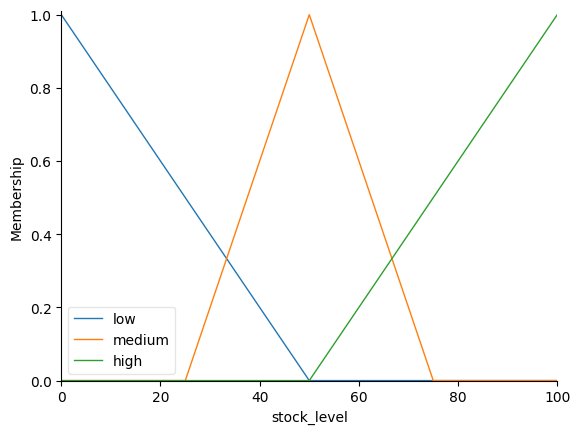

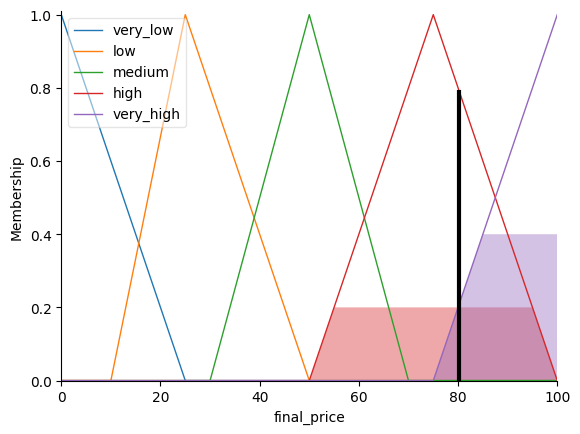

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
competitor_price = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')

final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

demand['low'] = fuzz.trimf(demand.universe, [0, 0, 50])
demand['medium'] = fuzz.trimf(demand.universe, [25, 50, 75])
demand['high'] = fuzz.trimf(demand.universe, [50, 100, 100])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 50])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [25, 50, 75])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [50, 100, 100])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 50])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [25, 50, 75])
production_cost['high'] = fuzz.trimf(production_cost.universe, [50, 100, 100])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 50])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [25, 50, 75])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [50, 100, 100])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 50])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [25, 50, 75])
stock_level['high'] = fuzz.trimf(stock_level.universe, [50, 100, 100])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 25])
final_price['low'] = fuzz.trimf(final_price.universe, [10, 25, 50])
final_price['medium'] = fuzz.trimf(final_price.universe, [30, 50, 70])
final_price['high'] = fuzz.trimf(final_price.universe, [50, 75, 100])
final_price['very_high'] = fuzz.trimf(final_price.universe, [75, 100, 100])

demand.view()
competitor_price.view()
production_cost.view()
seasonality.view()
stock_level.view()

rule1 = ctrl.Rule(demand['high'] & competitor_price['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])

rule4 = ctrl.Rule(demand['high'] & competitor_price['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule7 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['medium'], final_price['high'])

rule8 = ctrl.Rule(demand['medium'] & competitor_price['medium'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['low'] & competitor_price['high'] & stock_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])

rule11 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule13 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])

rule14 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['very_low'])
rule16 = ctrl.Rule(demand['medium'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])
rule17 = ctrl.Rule(demand['medium'] & competitor_price['low'] & stock_level['high'], final_price['very_low'])

vidu23_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
vidu23_simulation = ctrl.ControlSystemSimulation(vidu23_system)
vidu23_simulation.input['demand'] = 80
vidu23_simulation.input['competitor_price'] = 60
vidu23_simulation.input['production_cost'] = 50
vidu23_simulation.input['seasonality'] = 90
vidu23_simulation.input['stock_level'] = 30
vidu23_simulation.compute()
print("Final Price:", vidu23_simulation.output['final_price'])
final_price.view(sim=vidu23_simulation)

